In [57]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plyplot
import seaborn as sns 
from scipy import stats

In [2]:
original_data = pd.read_csv('Import Ready of WDIEXCEL.csv', encoding='ISO-8859-1', header=0)
original_data.dropna(how='all')

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Arab World,ARB,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"2005 PPP conversion factor, private consumptio...",PA.NUS.PRVT.PP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,8.236810e+01,8.278329e+01,8.312030e+01,8.353346e+01,8.389760e+01,8.417160e+01,8.451017e+01,NaN,NaN,NaN
3,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,8.600762e+01,8.642827e+01,8.707058e+01,8.817684e+01,8.734274e+01,8.913012e+01,8.967869e+01,9.027369e+01,NaN,NaN
4,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,7.346665e+01,7.394210e+01,7.524410e+01,7.716230e+01,7.553898e+01,7.874115e+01,7.966564e+01,8.074929e+01,NaN,NaN
5,Arab World,ARB,"Access to electricity, urban (% of urban popul...",EG.ELC.ACCS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,9.570462e+01,9.593924e+01,9.596217e+01,9.635293e+01,9.599783e+01,9.664992e+01,9.683418e+01,9.700397e+01,NaN,NaN
6,Arab World,ARB,Account ownership at a financial institution o...,FX.OWN.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.226054e+01,NaN,NaN,3.027713e+01,NaN,NaN,3.716521e+01,NaN,NaN
7,Arab World,ARB,Account ownership at a financial institution o...,FX.OWN.TOTL.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.377582e+01,NaN,NaN,2.207935e+01,NaN,NaN,2.563540e+01,NaN,NaN
8,Arab World,ARB,Account ownership at a financial institution o...,FX.OWN.TOTL.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.037767e+01,NaN,NaN,3.779076e+01,NaN,NaN,4.832852e+01,NaN,NaN
9,Arab World,ARB,Account ownership at a financial institution o...,FX.OWN.TOTL.OL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.574129e+01,NaN,NaN,3.421658e+01,NaN,NaN,4.254205e+01,NaN,NaN


In [3]:
print (original_data['Indicator Code'][1] =='PA.NUS.PRVT.PP.05' )
#print (original_data[4:5])

True


In [4]:
indicator_data = pd.DataFrame()

In [5]:
## Create a data table for the two specific indicator
## codes 

control_count = 0
test_count = 0 
count = 0
second_count = 1 

for x in original_data['Country Code']:
    ##Account ownership with a mobile-money-service provider
    if original_data['Indicator Code'][count] == 'FX.OWN.TOTL.ZS':
        indicator_data = indicator_data.append(original_data[count:second_count])
    
    ##Mobile Cellular Subscriptions 
    if original_data['Indicator Code'][count] == 'IT.CEL.SETS':
        indicator_data = indicator_data.append(original_data[count:second_count])
        test_count = test_count + 1
        
    ##Broadband Cellular Subscriptions 
    if original_data['Indicator Code'][count] == 'IT.NET.BBND':
        indicator_data = indicator_data.append(original_data[count:second_count])
        control_count = control_count + 1
    
    count = count + 1
    second_count = second_count + 1

In [6]:
print (indicator_data['2016'][2:3])

784    417212258.0
Name: 2016, dtype: float64


In [7]:
print('Test Count is {} and Control Count is {}'.format(test_count, control_count))

Test Count is 264 and Control Count is 264


In [39]:
## Parse out all Sierra Leone data 

sierraL_data = pd.DataFrame()
sierra_count = 0
sierra_secondCount = 1

indicator_data['Country Code'] =indicator_data['Country Code'].astype(str)  

for x in indicator_data['Country Name']:
    ##Sub Sahara Africa data
    if indicator_data['Country Code'].iloc[sierra_count] == 'SSF':
        sierraL_data = sierraL_data.append(indicator_data[sierra_count:sierra_secondCount])
    
    sierra_count = sierra_count + 1
    sierra_secondCount = sierra_secondCount + 1

In [40]:
print(str(sierraL_data))

             Country Name Country Code  \
60108  Sub-Saharan Africa          SSF   
60551  Sub-Saharan Africa          SSF   
60886  Sub-Saharan Africa          SSF   

                                          Indicator Name  Indicator Code  \
60108  Account ownership at a financial institution o...  FX.OWN.TOTL.ZS   
60551                      Fixed broadband subscriptions     IT.NET.BBND   
60886                      Mobile cellular subscriptions     IT.CEL.SETS   

       1960  1961  1962  1963  1964  1965  ...         2010          2011  \
60108   NaN   NaN   NaN   NaN   NaN   NaN  ...          NaN  2.324530e+01   
60551   NaN   NaN   NaN   NaN   NaN   NaN  ...    1345449.0  1.654192e+06   
60886   NaN   NaN   NaN   NaN   NaN   NaN  ...  387953418.0  4.717254e+08   

              2012         2013          2014         2015         2016  \
60108          NaN          NaN  3.418938e+01          NaN          NaN   
60551    2095874.0    2971686.0  3.613564e+06    3653258.0    38495

In [32]:


indicator_data.column = indicator_data.iloc[0]
print (indicator_data["Country Code"].iloc[0])

ARB


In [43]:
print(sierraL_data[0:].describe())

       1960  1961  1962  1963  1964  1965  1966  1967  1968  1969  ...  \
count   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
mean    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
std     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
min     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
25%     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
50%     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
75%     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
max     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   

               2010          2011          2012          2013          2014  \
count  2.000000e+00  3.000000e+00  2.000000e+00  2.000000e+00  3.000000e+00   
mean   1.946494e+08  1.577932e+08  2.732716e+08  3.105249e+08  2.281980e+08   
std    2.733731e+08  2.718745e+08  3.835004e+08  4.349460e+08  3.921253e+08   
min    1.345449e+

In [48]:
print(sierraL_data.iloc[0].describe())

count      7.000000
unique     7.000000
top       23.245304
freq       1.000000
Name: 60108, dtype: float64


In [56]:
print('test sample size:', len(sierraL_data.iloc[1]))
print('control sample size:', len(sierraL_data.iloc[2]))
print('test proportion:', sierraL_data.iloc[1].describe())

test sample size: 64
control sample size: 64
test proportion: count                                17
unique                               17
top       Fixed broadband subscriptions
freq                                  1
Name: 60551, dtype: object


In [74]:
print(sierraL_data.iloc[0][6:].mean())

33.347371419999995


In [84]:
stats.ttest_ind(sierraL_data.iloc[1][51:63],sierraL_data.iloc[2][51:63])

Ttest_indResult(statistic=-8.69985086934928, pvalue=1.4272689357012262e-08)

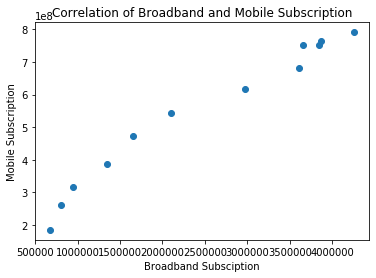

In [118]:
plyplot.scatter(x=sierraL_data.iloc[1][51:63], y=sierraL_data.iloc[2][51:63])
plyplot.xlabel('Broadband Subsciption')
plyplot.ylabel('Mobile Subscription')
plyplot.title('Correlation of Broadband and Mobile Subscription')
plyplot.show()

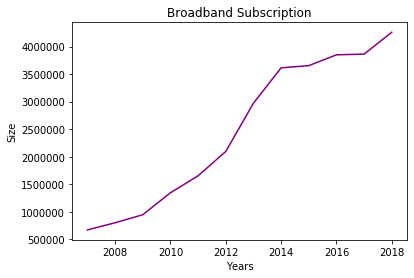

In [130]:
mobile_mean = sierraL_data.iloc[2][51:63].mean()
broadband_mean = sierraL_data.iloc[1][51:63].mean()
financialSub_mean = sierraL_data.iloc[0][51:63].mean()

df_Years = pd.DataFrame([2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018])




plyplot.plot(df_Years,sierraL_data.iloc[1][51:63], color='purple',label='Brodband Subscription')
plyplot.xlabel("Years")
plyplot.ylabel('Size')
plyplot.title('Broadband Subscription')
plyplot.show()

In [115]:
print(sierraL_data.iloc[0][51:63])

2007        NaN
2008        NaN
2009        NaN
2010        NaN
2011    23.2453
2012        NaN
2013        NaN
2014    34.1894
2015        NaN
2016        NaN
2017    42.6074
2018        NaN
Name: 60108, dtype: object


In [109]:
print(sierraL_data.iloc[2][51:63].describe())

count            12.0
unique           12.0
top       316759711.0
freq              1.0
Name: 60886, dtype: float64


In [114]:
print(sierraL_data.iloc[1][51:63].describe())

count         12.0
unique        12.0
top       671709.0
freq           1.0
Name: 60551, dtype: float64


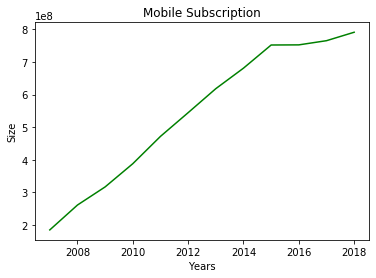

In [131]:
plyplot.plot(df_Years,sierraL_data.iloc[2][51:63], color='green',label='Mobile Subscription')
plyplot.xlabel('Years')
plyplot.ylabel('Size')
plyplot.title('Mobile Subscription')
plyplot.show()

In [129]:
sierraL_data.iloc[0:2][51:63].corr(method = 'pearson')

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1968,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1969,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
